In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind
from scipy.io import loadmat
from scipy.stats import lognorm
from scipy.optimize import curve_fit
from util import add_significance

In [54]:
CL = dict(gray=[199/255, 199/255, 199/255], orange=[255/255, 187/255, 120/255], \
         cyan=[158/255, 218/255, 229/255], white=[1, 1, 1])
C = dict(gray=[127/255, 127/255, 127/255], orange=[255/255, 127/255, 14/255], \
         cyan=[23/255, 190/255, 207/255], white=[1, 1, 1])

In [55]:
alldata = [np.load('data/etk340B_{0}.npz'.format(i)) for i in (1, 2, 3)]

In [56]:
def extract_population_stats(wells, all_data, sites=12, func=np.median):
    data_list = []
    for ad in all_data:
        st = [[fun(ad[f'{w}-Site_{i}'][..., 0]) for i in range(sites)] for w in wells]
        data_list.append([val for sublist in st for val in sublist])
    return np.array(data_list)

def compute_median(data, background=0):
    return [np.median(i - background) for i in data]

reference_wells = ['B4', 'C4', 'D4']
data_reference = extract_population_stats(reference_wells, alldata)
min_val = np.min(data_reference)

si = {}
si['nostim'] = compute_median(data_reference, min_val)
si['ctrl'] = compute_median(extract_population_stats(['B3', 'C3', 'D3'], alldata), min_val)
si['abcd'] = compute_median(extract_population_stats(['E3', 'F3', 'G3'], alldata), min_val)

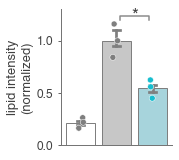

In [6]:

palette=[C['gray'], C['gray'], C['cyan'], C['cyan']]
palette1=[CL['white'], CL['gray'], CL['cyan'], CL['cyan']]

barprop = dict(ci=68, capsize=0.2, errcolor=C['gray'], edgecolor=C['gray'])

df = pd.DataFrame(si)/np.mean(si['ctrl'])
fig, ax = plt.subplots(1, 1, figsize=(2., 2.5))
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)

bar = sns.barplot(data=df, ax=ax, palette=palette1, **barprop)
ax.set_xticklabels(['$-$Rosi\n$+$siCtrl', '$+$Rosi\n$+$siCtrl', '$+$Rosi\n'+r'$+$siHIF'], fontsize=11, ha='center')
ax.set_xticks(np.array([-0.6, 0.4, 1.4, 2.5])+0.15)

ax.set_ylabel('lipid intensity\n(normalized)', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)

ax.set_yticks([0.0, 0.5, 1.0])

if ttest_ind(df.iloc[:, 1], df.iloc[:, 2]).pvalue < 0.05:
    add_significance(ax, bar, q0=1, q1=2, fontsize=18, yoff=0.05)

In [7]:

si1 = {}
si1['nostim'] = compute_median(data_reference, min_val)
si1['ctrl'] = compute_median(extract_population_stats(['B8', 'C8', 'D8'], alldata), min_val)
si1['abcd'] = compute_median(extract_population_stats(['E8', 'F8', 'G8'], alldata), min_val)

In [8]:
reference_wells = ['B4', 'C4', 'D4']
data_reference = extract_population_stats(reference_wells, alldata)
min_val = np.min(data_reference)

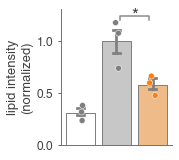

In [9]:
palette=[C['gray'], C['gray'], C['orange'], C['cyan']]
palette1=[CL['white'], CL['gray'], CL['orange'], CL['cyan']]

df = pd.DataFrame(si1)/np.mean(si1['ctrl'])
fig, ax = plt.subplots(1, 1, figsize=(2., 2.5))
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)

bar = sns.barplot(data=df, ax=ax, palette=palette1, **barprop)
ax.set_xticklabels(['$-$Rosi', '$+$Rosi', '$+$Rosi\n'+r'$+$stblHIF'], fontsize=11, ha='left')
ax.set_xticks(np.array([-0.6, 0.4, 1.4, 2.5])+0.15)

ax.set_ylabel('lipid intensity\n(normalized)', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)
ax.set_yticks([0.0, 0.5, 1.0])

if ttest_ind(df.iloc[:, 1], df.iloc[:, 2]).pvalue < 0.05:
    add_significance(ax, bar, q0=1, q1=2, fontsize=18, yoff=0.05)

In [10]:
alldata = [np.load('data/etk334_{0}.npz'.format(i)) for i in (1, 2, 3)]

In [11]:
ch = {}
ch['norosi'] = compute_median(extract_population_stats(['B11', 'C11', 'D11'], alldata))
ch['dmso'] = compute_median(extract_population_stats(['C4', 'B4'], alldata))
ch['PX'] = compute_median(extract_population_stats(['D4', 'E4'], alldata))
ch['FG'] = compute_median(extract_population_stats(['F4', 'G4'], alldata))

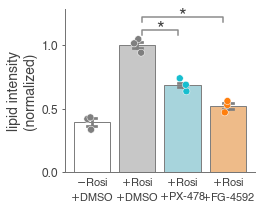

In [12]:

palette=[C['gray'], C['gray'], C['cyan'], C['orange']]
palette1=[CL['white'], CL['gray'], CL['cyan'], CL['orange']]

fig, ax = plt.subplots(1, 1, figsize=(3.4, 3))
barprop = dict(ci=68, capsize=0.2, errcolor=C['gray'], edgecolor=C['gray'])

df = pd.DataFrame.from_dict(ch)/np.mean(ch['dmso'])
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=7)

bar = sns.barplot(data=df, palette=palette1,  **barprop)

ax.set_xticklabels(['$-$Rosi\n$+$DMSO', '$+$Rosi\n$+$DMSO', '$+$Rosi\n'+r'$+$PX-478', '$+$Rosi\n'+r'$+$FG-4592'], fontsize=11,horizontalalignment='center')

ax.set_xticks(np.arange(4))

ax.set_ylabel('lipid intensity\n(normalized)', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)
ax.set_yticks([0.0, 0.5, 1.0])
add_significance(ax, bar, q0=1, q1=2, yoff=0.02)
add_significance(ax, bar, q0=1, q1=3, yoff=0.12)


# ax.set_xticks([])
# fig.savefig('inhact.svg', dpi=600, transparent=True)

In [13]:
alldata = np.load('data/dataeTK261hypo.npz')

In [18]:
from util import filter_data
# Load data
alldata = np.load('data/dataeTK261hypo.npz')
conditions = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']

# Process data for each condition
data = {}
for idx, condition in enumerate(conditions, start=1):
    data[condition] = np.hstack([alldata[f'hypo{idx}_1_Pos{i}'][:, 0] for i in range(19, 73)])
data['nonstim1'] = np.hstack([alldata[f'hypo6_1_Pos{i}'][:, 0] for i in range(1, 19)])

# Filter data and calculate values
filtered_data = {key: filter_data(value) for key, value in data.items()}
val0 = 100 * (np.percentile(filtered_data['h1'], 99) < filtered_data['h1']).sum() / len(filtered_data['h1'])
val1 = 100 * (np.percentile(filtered_data['h1'], 99) < filtered_data['h6']).sum() / len(filtered_data['h6'])


(-0.10865201497805854, 4.5)

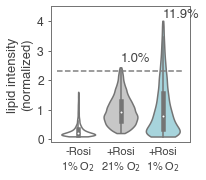

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
mean_h1 =  np.mean(filtered_data['h1'])
sns.violinplot(data=[filtered_data['nonstim1']/mean_h1, filtered_data['h1']/mean_h1, filtered_data['h6']/mean_h1], scale='width', palette=palette1, edgecolor=[0, 0, 0], cut=0)

ax.set_xticklabels(['-Rosi\n1% O$_2$', '+Rosi\n21% O$_2$', '+Rosi\n1% O$_2$'], fontsize=11, ha='center')
# ax.set_xticks(range(3))

# Draw line and add text
yy = np.percentile(filtered_data['h1']/mean_h1, 99)

ax.plot(ax.get_xlim(), (yy, yy), '--', color='tab:gray')
ax.text(1, yy*1.15, f'{val0:.1f}%', fontsize=13)
ax.text(2, yy*1.8, f'{val1:.1f}%', fontsize=13)

ax.set_ylabel('lipid intensity\n(normalized)', fontsize=13)
ax.tick_params(axis='x', length=0)

ax.set_ylim(ax.get_ylim()[0], 4.5)

In [49]:
alldata = np.load('data/dataeTK283b_plate1.npz')
ndata = {}
for f in alldata.keys():
    well = f.split('-Site')[0]
    if well in ndata:
        ndata[well] = np.vstack([ndata[well], alldata[f]])
    else:
        ndata[well] = alldata[f]
a0 = np.concatenate([alldata['C2-Site_{0}'.format(i)][:, 0] for i in range(8)])
a1 = np.concatenate([alldata['C9-Site_{0}'.format(i)][:, 0] for i in range(8)])
a2 = np.concatenate([alldata['E9-Site_{0}'.format(i)][:, 0] for i in range(8)])
d = [fil(a0), fil(a1), fil(a2)]
dd = [i/np.mean(d[1]) for i in d]

In [50]:
val0 = 100 * (np.percentile(dd[1], 99) < dd[1]).sum() / len(dd[1])
val1 = 100 * (np.percentile(dd[1], 99) < dd[2]).sum() / len(dd[2])

(-0.16129728145897387, 6.232129855565727)

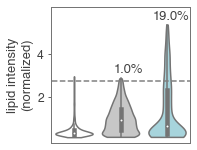

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))

sns.violinplot(data=dd, scale='width', palette=palette1, edgecolor=[0, 0, 0], cut=0)
ax.set_xticklabels(['-Rosi', '+Rosi', '+Rosi\n'+r'+stblHIF'], fontsize=11, ha='left');

ax.set_xticks(np.array([-0.5, 0.5, 1.5])+0.2)
ax.set_yticks(ax.get_yticks()[2:-1]);
ax.set_ylabel('lipid intensity\n(normalized)', fontsize=13)
ax.tick_params(axis='x', length=0)

ax.set_xlim(ax.get_xlim())
yy = np.percentile(dd[1], 99)
ax.plot((-1, 10), (yy, yy), '--', color='tab:gray')
ax.text(1*0.85, yy*1.15, '{0:.1f}%'.format(val0), fontsize=13)
ax.text(2*0.85, yy*2.05, '{0:.1f}%'.format(val1), fontsize=13)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], ylim[1]*1.1)

In [20]:
day1 = loadmat('data/day1.mat')
conc = np.array([0, 1, 3.9, 15.6, 62.5, 250, 1000])
dox = [0,0.03125,0.0625, 0.125,0.25, 0.5, 1]

In [21]:

def func(x, b, c, d, e):
    return c + (d-c)/(1 + np.exp(b * (np.log(x)-e)))

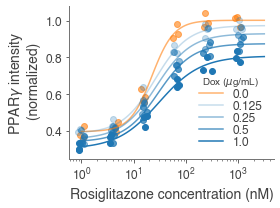

In [22]:
pdiff = day1['meanppargplate'][:,:,:]
pdiff = np.flipud(pdiff)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

doxconc = np.array([0, 125, 250, 500, 1000])/1000

pdiff = np.concatenate([pdiff[:, :1, :], pdiff[:, 3:, :]], axis=1)

meanl = np.mean(pdiff[:, :, :], -1)

pdiff = pdiff/meanl[:, 0].max()
meanl = meanl/meanl[:, 0].max()

dic = {}
codic = []
for i in range(5):
    y = pdiff[1:, i, 0]
    y = pdiff[1:, i, :].flatten()
    xx = np.stack([conc[1:], conc[1:], conc[1:]]).T.flatten()
    coeff, var_matrix = curve_fit(func, xx, y, p0=[-1, y[0], 1.0, np.random.random()])
    variance = np.diagonal(var_matrix) #Refer [3]
    SD = np.sqrt(variance)
    dic[i] = coeff[-1], SD[-1]
    codic.append(coeff)

for i in range(5):
    color = 'tab:orange' if i == 0 else 'tab:blue'
    alpha = 0.6 if i == 0 else i * 0.25
    for j in range(3):
        ax.scatter(lognorm.rvs(0.1, size=7) * conc, pdiff[:, i, j], color=color, alpha=alpha)

_x = np.logspace(0, 3.5, 100)
for n, i in enumerate(codic):
    color = 'tab:orange' if n == 0 else 'tab:blue'
    alpha = 0.6 if n == 0 else n * 0.25
    ax.plot(_x, func(_x, *i), '-', color=color, alpha=alpha, label=doxconc[n])

ax.set_xscale('log')
ax.set_xlabel('Rosiglitazone concentration (nM)', fontsize=14)
ax.set_ylabel('PPAR$\gamma$ intensity \n (normalized)', fontsize=14)
plt.legend(title='Dox ($\mu$g/mL)', frameon=False, fontsize=12, labelspacing=0.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xscale('log')
plt.tight_layout()

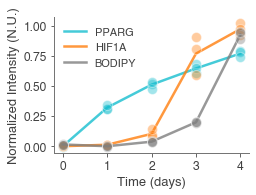

In [52]:
# Load data
d = loadmat('data/meanlevel.mat')
labels = ['rosi']
variables = ['pparg', 'hif1a', 'bodipy']
colors = {'pparg': 'tab:cyan', 'hif1a': 'tab:orange', 'bodipy': 'tab:gray'}
lineprops = dict(linewidth=2.5, alpha=0.8)
scatprops = dict(alpha=0.4, markeredgecolor='w', markersize=10)

data = {}
for variable in variables:
    data[variable] = {}
    for label in labels:
        temp = d["".join(['mean', variable])][:, 2, :]
        baseline = 0 if variable != 'bodipy' else 1
        temp = (temp - np.mean(temp[:, baseline])) / np.mean(temp[:, -1])
        data[variable][label] = temp

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
for variable in variables:
    for label in labels:
        # Line plot
        ax.plot(np.mean(data[variable][label], axis=0), color=colors[variable], 
                label=f"{variable.upper()}", **lineprops)
        
        # Scatter plot
        for i in range(5):
            ax.plot([i] * 3, data[variable][label][:, i], 'o', color=colors[variable], **scatprops)

ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('Time (days)', fontsize=13)
ax.set_ylabel('Normalized Intensity (N.U.)', fontsize=13)
ax.legend(frameon=False, fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [25]:
d = loadmat('data/matrix_compiled.mat')

In [26]:
eachlevel = np.hstack([np.expand_dims(d['meanbodipyplate'][-2:, 4], 1), np.expand_dims(d['meanbodipyplate'][-2:, -1], 1), d['meanbodipyplate'][-2:, 5:-1]])
qq = eachlevel
dq = {}
for i in range(6):
    dq[i] = qq[:, i]/qq[:, 1].mean()


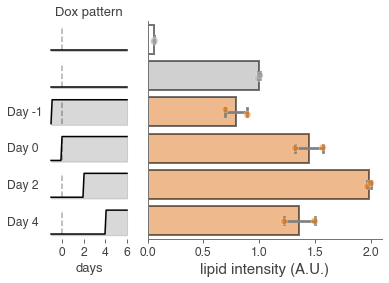

In [27]:
palette = [[.66, .66, .66], [0.66, 0.66, 0.66],'tab:orange', 'tab:orange','tab:orange','tab:orange']
palette1 = [[1, 1, 1], [0.66, 0.66, 0.66],'tab:orange', 'tab:orange','tab:orange','tab:orange']

time = np.linspace(-1, 6, 70)

fig = plt.figure(figsize=(6, 4))
grid = plt.GridSpec(6, 20, wspace=0.005, hspace=0.1, figure=fig)
y = np.zeros(len(time))
y[3:] = 1

M = 6
a = plt.subplot(grid[:, M:])
sns.stripplot(data=pd.DataFrame.from_dict(dq), palette=palette, edgecolor='w', linewidth=0.5, size=7, orient='h', alpha=0.54)

barprop = dict(ci=68, alpha=0.54, capsize=0.2, errcolor='gray', edgecolor='k')
bar = sns.barplot(data=pd.DataFrame.from_dict(dq), orient='h', palette=palette1, linewidth=2., **barprop)


a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.set_yticks([])
a.set_xlabel('lipid intensity (A.U.)', fontsize=15)


tims = (None, None, 0, 1, 3, 5)
for i in range(6):
    a = plt.subplot(grid[i, :M-1])
    y = np.zeros(len(time))
    if i > 0:
        if i==2:
            y[1:] = 1
        elif i>2:
            y[tims[i] *10:] = 1
    a.plot(time, y, 'k')
    a.fill_between(time, -.05, y, color='tab:gray', alpha=0.3)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.set_yticks([])
    a.set_ylim([-.2, 1.2])
    if i==0:
        a.set_title('Dox pattern', fontsize=13)
    a.plot([0, 0], [0, 1], '--k', alpha=0.33)
    if i>1:
        a.set_ylabel('Day {0}'.format(tims[i]-1), rotation=0, fontsize=12, horizontalalignment='left', labelpad=40, verticalalignment='center')
    if i==5:
        a.set_xticks([0, 2, 4, 6])
    else:
        a.set_xticks([])
    if i == 5:
        a.set_xlabel('days', fontsize=13)


In [28]:
alldata = np.load('data/dataeTK261hypo.npz')

In [29]:
conditions = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
grouping_sequence = ['nonstim', 'h1', 'h2', 'h4', 'h5', 'h3']

# Aggregate median data
median_data = {a: [np.median(alldata[f'hypo{n+1}_1_Pos{i}'][:, 0]) for i in range(19, 73)] for n, a in enumerate(conditions)}
median_data['nonstim'] = [np.median(alldata[f'hypo1_1_Pos{i}'][:, 0]) for i in range(1, 19)]

grouped_data = [median_data[g] for g in grouping_sequence]
mean_grouped_data = [[np.mean(median_data[g][i:i+6]) for i in range(0, len(median_data[g]), 6)] for g in grouping_sequence]
averaged_data = [mean_grouped_data[0]] + [[np.mean([i0, i1]) for (i0, i1) in zip(i[::2], i[1::2])] for i in mean_grouped_data[1:]]
normalized_data = [np.array(d)/np.mean(averaged_data[1]) for d in averaged_data]


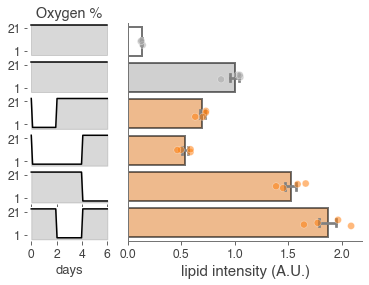

In [30]:

COLOR2 = 'tab:orange'
fig = plt.figure(figsize=(6, 4))

grid = plt.GridSpec(6, 20, wspace=0.005, hspace=0.1, figure=fig)
ax = []
time = np.linspace(0, 6, 60)
ys = [[None, 0],[None, 0], [1, 2*10], [1, 4*10], [4*10, None], [2*10, 4*10]]
M = 6

for num in range(6):
    a = plt.subplot(grid[num, :M-1])
    y = np.ones(len(time)) * 21
    y[ys[num][0]:ys[num][1]] = 1
    a.plot(time, y, 'k')
    a.fill_between(time, -.05, y, color='tab:gray', alpha=0.3)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.set_yticks([3, 19])
    a.set_yticklabels([1,21],fontsize=12)
    if num<4:
        a.set_xticks([])
    else:
        a.set_xticks([0, 2, 4, 6])
    if num ==0:
        a.set_title('Oxygen %')
    if num == 5:
        a.set_xlabel('days', fontsize=13)

a = plt.subplot(grid[:, M:])
ax.append(a)
[ax[i].set_xlim([1, 7]) for i in range(len(ax)-1)]

palette = [[.66, .66, .66], [0.66, 0.66, 0.66],'tab:orange', 'tab:orange','tab:orange','tab:orange']
palette1 = [[1, 1, 1], [0.66, 0.66, 0.66],'tab:orange', 'tab:orange','tab:orange','tab:orange']

y = np.zeros(len(time))
y[3:] = 1

a = plt.subplot(grid[:, M:])

sns.stripplot(data=normalized_data, palette=palette, edgecolor='w', linewidth=0.5, size=7, orient='h', alpha=0.54)

barprop = dict(ci=68, alpha=0.54, capsize=0.2, errcolor='gray', edgecolor='k', linewidth=2.0)
bar = sns.barplot(data=normalized_data, orient='h', palette=palette1, **barprop)


a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.set_yticks([])
a.set_xlabel('lipid intensity (A.U.)', fontsize=15)

ax[-1].set_yticks([])

[a.set_ylabel(None) for a in ax];

for a in ax[:-1]:
    a.set_xticks([])
    a.set_yticks([])

In [60]:
alldata347 = [np.load('data/etk347_{0}.npz'.format(i)) for i in (1, 2, 3)]
def getd(wells):
    sst = []
    for ad in alldata347:
        st = []
        for w in wells:
            st.append([np.median(ad['{0}-Site_{1}'.format(w, i)][..., 0]) for i in range(12)])
        sst.append([i for j in st for i in j])
    return sst

# low FG
ch = {}
ch['norosi'] = [np.median(i) for i in getd(['B9', 'C9', 'D9'])]
ch['dmso'] = [np.median(i) for i in getd(['B2', 'C2', 'D2'])]
ch['dox'] = [np.median(i) for i in getd(['E2', 'F2', 'G2'])]
ch['FG'] = [np.median(i) for i in getd(['B3', 'C3', 'D3'])]
ch['dox+FG'] = [np.median(i) for i in getd(['E3', 'F3', 'G3'])]

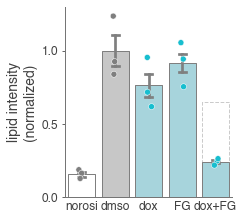

In [62]:
palette=["tab:gray", "tab:gray", "tab:cyan", "tab:cyan", "tab:cyan"]
palette1=["white", "tab:gray", "tab:cyan", "tab:cyan", "tab:cyan"]

palette=[C['gray'], C['gray'], C['cyan'], C['cyan'], C['cyan']]
palette1=[CL['white'], CL['gray'], CL['cyan'], CL['cyan'], CL['cyan']]
palette2=[CL['white'], CL['gray'], CL['cyan'], CL['cyan'], CL['white']]


barprop = dict(ci=68, capsize=0.2, errcolor="tab:gray", edgecolor="tab:gray")

df = pd.DataFrame(ch)/np.mean(ch['dmso'])
fig, ax = plt.subplots(1, 1, figsize=(3, 3.5))
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)


j0, j1, j2, j3, j4 = df.mean()
bar = sns.barplot(data=pd.DataFrame(([j0, j1, j2, j3, (j2-j0)/(j1-j0) * (j3-j0)/(j1-j0)])).T, ax=ax, palette=palette2, linestyle='--', alpha=0.4, **barprop)

bar = sns.barplot(data=df, ax=ax, palette=palette1, **barprop)
ylim = ax.get_ylim()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0, 0.5, 1.0]);
ax.tick_params(axis='x', length=0)
ax.set_ylabel('lipid intensity\n(normalized)', fontsize=14)
ylim = ax.get_ylim()

In [33]:
data = dict(np.load('data/highrosi338.npz'))
data0 = dict(np.load('data/medrosi338.npz'))
for k, v in data0.items():
    data[k] = v

    dr = {}
for n0, alp in enumerate(('B', 'C', 'D', 'E', 'F', 'G')):
    for n1, v in enumerate(range(2, 12)):
        for s in range(9):
            name = '{0}{1}_Site_{2}'.format(alp, v, s)
            try:
                if alp in dr:
                    dr['{0}'.format(alp)] = np.vstack([dr['{0}'.format(alp)], data[name]])
                else:
                    dr['{0}'.format(alp)] = data[name]
            except:
                pass

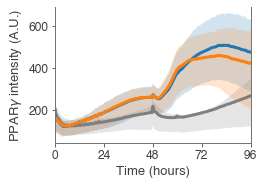

In [34]:
time = list(np.arange(0, 395 * 15/60, 15/60))
time.pop(89)
time.pop(88)

fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
ax.plot(time, dr['B'].T.mean(axis=1), 'tab:gray', lw=3)
y25 = np.nanpercentile(dr['B'], 25, axis=0)
y75 = np.nanpercentile(dr['B'], 75, axis=0)
ax.fill_between(time, y25, y75, where=y75 >= y25,
                 facecolor='tab:gray', interpolate=True, alpha=0.2)

ax.plot(time, dr['D'].T.mean(axis=1), 'tab:blue', lw=3)
y25 = np.nanpercentile(dr['D'], 25, axis=0)
y75 = np.nanpercentile(dr['D'], 75, axis=0)
ax.fill_between(time, y25, y75, where=y75 >= y25,
                 facecolor='tab:blue', interpolate=True, alpha=0.2)

ax.plot(time, dr['G'].T.mean(axis=1), 'tab:orange', lw=3)
y25 = np.nanpercentile(dr['G'], 25, axis=0)
y75 = np.nanpercentile(dr['G'], 75, axis=0)
ax.fill_between(time, y25, y75, where=y75 >= y25,
                 facecolor='tab:orange', interpolate=True, alpha=0.2)

ax.set_xlim(0, 96)
ax.set_ylabel(r'PPAR$\gamma$ intensity (A.U.)', fontsize=13)
ax.set_xlabel(r'Time (hours)', fontsize=13)
ax.set_xticks((0, 24, 48, 72, 96));

ax.spines['top'].set_visible(False)

In [35]:
comb0a = np.hstack([dr['D'][:, 232]])
comb1a = np.hstack([dr['D'][:, -1]])
comb0a, comb1a = comb0a[(comb0a > 0) & (comb1a > 0)], comb1a[(comb0a > 0) & (comb1a > 0)]

comb0b = np.hstack([dr['G'][:, 232]])
comb1b = np.hstack([dr['G'][:, -1]])
comb0b, comb1b = comb0b[(comb0b > 0) & (comb1b > 0)], comb1b[(comb0b > 0) & (comb1b > 0)]

a0, a1 = comb0a, comb1a
b0, b1 = comb0b, comb1b
a0, a1, b0, b1 = np.log(a0+1), np.log(a1+1), np.log(b0+1), np.log(b1+1)

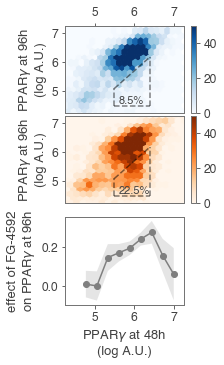

In [36]:
y0, y1 = 5.1, 6.0
x0, x1 = 5.5, 6.25
r0, r1 = 5.5, 6.4

fun = lambda x: ((y1-y0)/(x1-x0)) * (x-x0) + y0

fig, axes = plt.subplots(4, 2, gridspec_kw={'height_ratios': [1.0, 1.0, 0.1, 1.0], 'width_ratios': [10, 0.5]}, figsize=(2.5, 4.5))
plt.tight_layout(h_pad=-2.1, w_pad=-2.5)

for i, (data, cmap, alpha, vmax, label, percentage) in enumerate(zip([(a0, a1), (b0, b1)], ['Blues', 'Oranges'], [1.0, 1.0], [50, 50], ['PPAR$\gamma$ at 96h\n(log A.U.)', 'PPAR$\gamma$ at 96h\n(log A.U.)'], ['8.5%', '22.5%'])):
    ax = axes[i, 0]
    hg = ax.hexbin(*data, gridsize=28, mincnt=0, cmap=cmap, alpha=alpha, vmax=vmax)
    ax.set_xlim(4.25, 7.25)
    ax.set_ylim(4.25, 7.25)
    ax.set_ylabel(label, fontsize=13)
    ax.set_yticks([5, 6, 7])
    ax.set_xticks([5, 6, 7])
    cb = fig.colorbar(hg, cax=axes[i, 1])
    cb.set_ticks([0, 20, 40])
    cb.set_ticklabels([0, 20, '40'])
    ax.plot((r0, r1), fun(np.array([r0, r1])), '--k', alpha=0.5)
    ax.plot((r0, r0), (4.5, fun(r0)), '--k', alpha=0.5)
    ax.plot((r1, r1), (4.5, fun(r1)), '--k', alpha=0.5)
    ax.plot((r0, r1), (4.5, 4.5), '--k', alpha=0.5)
    ax.text(5.6, 4.6, percentage, fontsize=11)

axes[0, 0].xaxis.tick_top()
axes[0, 0].xaxis.set_label_position('top')

axes[1, 0].set_xticks([])
axes[2, 0].set_visible(False)
axes[2, 1].set_visible(False)

st0 = []
sran = np.linspace(4.5, 7., 10)
for i0, i1 in zip(sran[:-1], sran[1:]):
    a1s = a1[(a0 > i0) & (a0 < i1)]
    b1s = b1[(b0 > i0) & (b0 < i1)]
    st1 = []
    for i in range(100):
        st1.append(np.mean(np.random.choice(a1s, int(len(a1s)/2), replace=True)) - np.mean(np.random.choice(b1s, int(len(b1s)/2), replace=True)))
    st0.append(st1)

ss = np.vstack(st0)
ax = axes[3, 0]
ax.plot(sran[1:], ss.mean(axis=1), '-o', color='tab:gray')
y25, y75 = ss.mean(axis=1)-ss.std(axis=1), ss.mean(axis=1)+ss.std(axis=1)
ax.fill_between(sran[1:], y25, y75, where=y75 >= y25, facecolor='tab:gray', interpolate=True, alpha=0.2)

ax.set_xlabel('PPAR$\gamma$ at 48h\n(log A.U.)', fontsize=13)
ax.set_ylabel('effect of FG-4592\non PPAR$\gamma$ at 96h', fontsize=13)
ax.set_xlim(axes[1, 0].get_xlim())
axes[3, 1].set_visible(False)

Text(0.5, 1.0, 'Experiment')

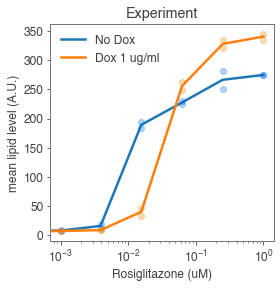

In [37]:
day6 = loadmat('data/day6.mat')
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x = conc/1000
ax.plot(x, np.flip(np.mean(day6['meanbodipyplate'][:,0,:]/1000, axis=-1)), color='tab:blue', label='No Dox', linewidth=2.5)
ax.plot(x, np.flip(day6['meanbodipyplate'][:, 0, 0])/1000, 'o', color='#056FF0', alpha=0.3)
ax.plot(x, np.flip(day6['meanbodipyplate'][:, 0, 1])/1000, 'o', color='#056FF0', alpha=0.3)
ax.plot(x, np.flip(np.mean(day6['meanbodipyplate'][:,-1,:]/1000, axis=-1)), color='tab:orange', label='Dox 1 ug/ml', linewidth=2.5)
ax.plot(x, np.flip(day6['meanbodipyplate'][:, -1, 0])/1000, 'o', color='#F08605', alpha=0.3)
ax.plot(x, np.flip(day6['meanbodipyplate'][:, -1, 1])/1000, 'o', color='#F08605', alpha=0.3)
ax.set_xscale('log')
ax.legend(frameon=False, fontsize=12)
ax.set_xlabel('Rosiglitazone (uM)', fontsize=12)
ax.set_ylabel('mean lipid level (A.U.)',fontsize=12)
ax.set_title('Experiment')

Text(0, 0.5, 'lipid level (normalized)')

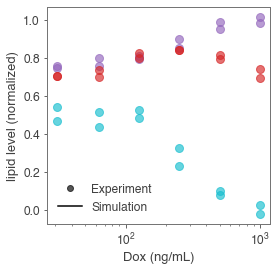

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
day6 = loadmat('data/day6.mat')
bodipy = day6['meanbodipyplate'][:, :, :]
bodipy -= bodipy[3, 1:, :].mean(axis=1).min()
bodipy /=bodipy[0, 1:, :].mean(axis=1).max()

doxconc = [0, 31, 63, 125, 250, 500, 1000]
pltopt = dict(markersize=8, alpha=0.66)
ax.plot(doxconc[1:], bodipy[0, 1:, 0], 'o', color='tab:purple', **pltopt)
ax.plot(doxconc[1:], bodipy[0, 1:, 1], 'o', color='tab:purple', **pltopt)
ax.plot(doxconc[1:], bodipy[2, 1:, 0], 'o', color='tab:red', **pltopt)
ax.plot(doxconc[1:], bodipy[2, 1:, 1], 'o', color='tab:red', **pltopt)
ax.plot(doxconc[1:], bodipy[3, 1:, 0], 'o', color='tab:cyan', **pltopt)
ax.plot(doxconc[1:], bodipy[3, 1:, 1], 'o', color='tab:cyan', **pltopt)
ax.set_xscale('log')

ax.set_xlabel('Dox (ng/mL)', fontsize=13)

ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())

l0, = ax.plot(5, 3, 'ko', alpha=0.66)
l1, = ax.plot(5, 3, 'k')
ax.legend([l0, l1], ['Experiment', 'Simulation'], frameon=False, loc='lower left', fontsize=12)
ax.set_ylabel('lipid level (normalized)', fontsize=13)
